In [101]:
!gdown 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 12.6MB/s]


## Bài tập 1 (kỹ thuật đọc và xử lý dữ liệu từ file .csv): Cho trước file dữ liệu advertising.csv, hãy hoàn thành function prepare_data(file_name_dataset) trả về dữ liệu đã được tổ chức (X cho input và y cho output).

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
  result = []
  for row in data:
    result.append(row[index])
  return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # Get tv (index=0)
  tv_data = get_column(data, 0)

  # Get radio (index=1)
  radio_data = get_column(data, 1)

  # Get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # Get sales (index=3)
  sales_data = get_column(data, 3)

  # Building X input and y output for training
  X, y = [tv_data, radio_data, newspaper_data], sales_data

  return X, y

In [103]:
# Question 1
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


## Bài tập 2 (kỹ thuật huấn luyện data dùng one sample - linear regression):
Sử dụng kết quả dữ liệu đầu vào X, và dữ liệu đầu ra y từ bài 1, để phát triển chương trình dự đoán thông tin sales (y) từ X bằng cách dùng giải thuật linear regression with one sample-training với loss được tính bằng công thức Mean Squared Error $L = (\hat{y} - y)^2$. Nhiệm vụ của bạn là hoàn thành function implement_linear_regression(X_data, y_data,epoch_max, lr) và trả về 4 tham số w1, w2, w3, b và lịch sử tính loss như bên dưới.

### 2.1 Hoàn thành function initialize_params() để khởi tạo ngẫu nhiên giá trị ban đầu cho w1, w2, w3 theo gaussian random.gauss(mu=0.0, sigma=0.01) và b = 0. Ở bước này các bạn có thể dùng hàm sau để khởi tạo bốn tham số trên.

In [104]:
def initialize_params():
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)
  b = 0

  return w1, w2, w3, b

In [105]:
def initialize_params():
  w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
  return w1, w2, w3, b

### 2.2 Hoàn thành function predict(x1, x2, x3, w1, w2, w3, b) để trả về kết quả dự đoán y tương ứng

In [106]:
def predict(x1, x2, x3, w1, w2, w3, b):
  result = w1 * x1 + w2 * x2 + w3 * x3 + b
  return result

In [107]:
# Question 2
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [108]:
X, y = prepare_data('advertising.csv')

### 2.3 Hoàn thành function compute_loss(y_hat, y) để tính loss giữa kết quả dự đoán y_hat và giá trị thực y, sử dụng Mean Squared Error

In [109]:
def compute_loss(y_hat, y):
  loss = (y_hat - y)**2
  return loss

In [110]:
# Question 3
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


### 2.4 Hoàn thành function compute_gradient_wi(xi, y, y_hat) để tính đạo hàm của hàm loss $L = (\hat{y} - y)^2$ theo wi và function compute_gradient_b(y, y_hat) để tính đạo hàm của hàm loss $L = (\hat{y} - y)^2$ theo b.

In [111]:
def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2 * xi * (y_hat - y)
  return dl_dwi

def compute_gradient_b(y, y_hat):
  dl_db = 2 * (y_hat - y)
  return dl_db

In [112]:
# Question 4
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [113]:
# Question 5
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


### 2.5 Hoàn thành function update_weight_wi(wi, dl_dwi, lr) để cập nhật wi sau khi tính đạo làm hàm loss L theo wi, và function update_weight_b(b, dl_db, lr) để update bias (b) sau khi tính đạo làm hàm loss L theo b.

In [114]:
# Update weights
def update_weight_wi(wi, dl_dwi, lr):
  wi = wi - lr * dl_dwi
  return wi

def update_weight_b(b, dl_db, lr):
  b = b - lr * dl_db
  return b

In [115]:
# Question 6
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [116]:
# Question 7
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


In [117]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
    for i in range(N):
      # Get a sample
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      # Compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      # Compute loss
      loss = compute_loss(y, y_hat)

      # Compute gradient w1, w2, w3, b
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)

      # Update parameters
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)
      b = update_weight_b(b, dl_db, lr)

      # Logging
      losses.append(loss)

  return (w1, w2, w3, b, losses)

### 2.6 Thực hiện huấn luyện data bằng cách gọi hàm implement_linear_regression(X, y) và vẽ đồ thị kết quả cho 100 giá trị loss đầu tiên (loss cho 100 lần cập nhật đầu tiên) như bên hình 3.

In [118]:
print(type(y))

<class 'list'>


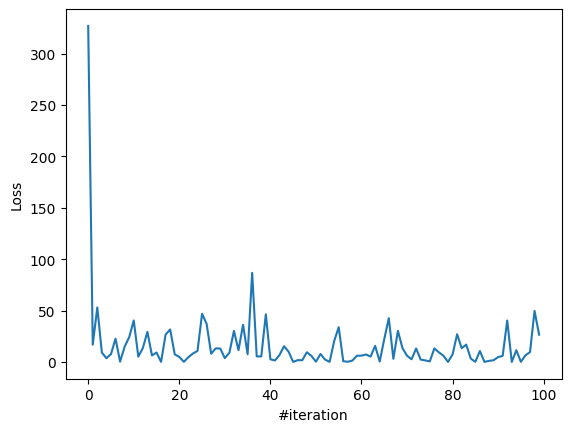

In [119]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

In [120]:
# Question 8
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [121]:
# Question 9
# Given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'Predicted sales is {sales}')

Predicted sales is 8.176413319549823


### 2.7 Thực hiện huấn luyện data bằng cách thay thế hàm loss $L = (\hat{y} - y)^2$ bằng hàm loss MAE $L = |\hat{y} - y|$ và vẽ đồ thị kết quả hàm loss trong 100 interation đầu tiên như bên hình 4.

In [122]:
# Question 10
def compute_loss_mae(y_hat, y):
  loss = abs(y_hat - y)
  return loss

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


## Bài tập 3: Kỹ thuật huấn luyện dữ liệu dùng batch N samples - Linear Regression

Cải tiến giải thuật ở bài tập 2, bằng cách huấn luyện giải thuật linear regression sử dụng N samples-training. Công việc của bạn ở bài tập này là bạn cần implement lại function `implement_linear_regression_nsamples` sử dụng N sample-training với hàm mất mát MSE:

$ L(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N} (\hat{y} - y)^2 $

và hàm mất mát MAE (tùy chọn):

$ L(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^{N} |\hat{y} - y| $

In [123]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):

    loss_total = 0.0
    dw1_total = 0.0
    dw2_total = 0.0
    dw3_total = 0.0
    db_total = 0.0

    for i in range(N):
      # Get a sample
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      # Compute output
      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      # Compute loss
      loss = compute_loss(y, y_hat)

      # Accumulate loss
      loss_total += loss

      # Compute gradient w1, w2, w3, b
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)

      # Accumulate gradient
      dw1_total += dl_dw1
      dw2_total += dl_dw2
      dw3_total += dl_dw3
      db_total += dl_db

    # Update parameters
    w1 = update_weight_wi(w1, dl_dw1 / N, lr)
    w2 = update_weight_wi(w2, dl_dw2 / N, lr)
    w3 = update_weight_wi(w3, dl_dw3 / N, lr)
    b = update_weight_b(b, dl_db / N, lr)

    # Logging
    losses.append(loss_total/N)

  return (w1, w2, w3, b, losses)

[172.98395547828923, 171.54706415209617, 170.12450084883872, 168.71611742050771, 167.32176728169955, 165.94130539296336, 164.57458824432356, 163.22147383897914, 161.88182167717906, 160.55549274026941, 159.24234947491144, 157.94225577746883, 156.65507697856347, 155.38067982779344, 154.11893247861914, 152.8697044734079, 151.63286672863947, 150.40829152027138, 149.19585246926016, 147.99542452723693, 146.8068839623377, 145.6301083451848, 144.4649765350183, 143.3113686659766, 142.16916613352342, 141.03825158102035, 139.91850888644248, 138.80982314923807, 137.71208067732738, 136.62516897424092, 135.54897672639592, 134.48339379050856, 133.42831118114148, 132.38362105838428, 131.34921671566605, 130.32499256769785, 129.31084413854552, 128.30666804982857, 127.3123620090471, 126.32782479803176, 125.35295626151947, 124.3876572958493, 123.43182983778136, 122.48537685343346, 121.5482023273382, 120.6202112516147, 119.70130961525851, 118.79140439354532, 117.89040353754764, 116.99821596376337, 116.1147

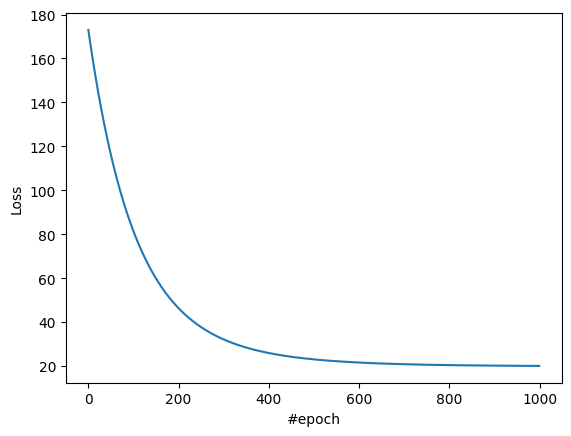

In [124]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('Loss')
plt.show()

In [125]:
# Question 11:
X, y = prepare_data('advertising.csv')

# Using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5)

print(w1, w2, w3)

0.07865211655017688 0.009363049405216773 3.387579445815582e-06


## Bài tập 4
Như chúng ta đã biết, mục đích của linear regression là tìm hàm xấp xỉ y = ax1 + bx2 + cx3 + bx0. Trong đó x1 là TV, x2 là Radio, x3 là Newspapers, và x0 = 1. Đầu tiên, bạn cần tổ chức lại dữ liệu đầu vào ở bài tập 1 theo dạng danh sách các feature (x0, x1, x2, x3). Ví dụ theo hình 1, dữ liệu đầu vào dòng thứ 1 và 2 ta có thể tổ chức lại như sau:

X[0] = [1, x1, x2, x3] = [1, 230.1, 37.8, 69.2]

X[1] = [1, x1, x2, x3] = [1, 44.5, 39.3, 45.1]

....

X[199] = [1, x1, x2, x3] = [1, 232.1, 8.6, 8,7]

In [134]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # Get TV (index=0)
  tv_data = get_column(data, 0)

  # Get radio (index=1)
  radio_data = get_column(data, 1)

  # Get newspaper(index=2)
  newspaper_data = get_column(data, 2)

  # Get sales (index=3)
  sales_data = get_column(data, 3)

  # Building X input and y output for training
  # Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data

  return X, y

In [135]:
def initialize_params():
  bias = 0
  w1 = random.gauss(mu=0.0, sigma=0.01)
  w2 = random.gauss(mu=0.0, sigma=0.01)
  w3 = random.gauss(mu=0.0, sigma=0.01)

  # Cmt this line for real application
  #return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
  return [bias, w1, w2, w3]

In [136]:
# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3
def predict(X_features, weights):
  result = sum([f*w for f, w in zip(X_features, weights)])
  return result

def compute_loss(y_hat, y):
  loss = (y_hat - y)**2
  return loss

# compute_gradient
def compute_gradient_wi(X_features, y, y_hat):
  dl_dweights = []
  for i in range(len(X_features)):
    dl_dweights.append(2 * X_features[i] * (y_hat - y))
  return dl_dweights

# Update weights
def update_weight(weights, dl_dweights, lr):
  for i in range(len(weights)):
    weights[i] = weights[i] - lr * dl_dweights[i]
  return weights


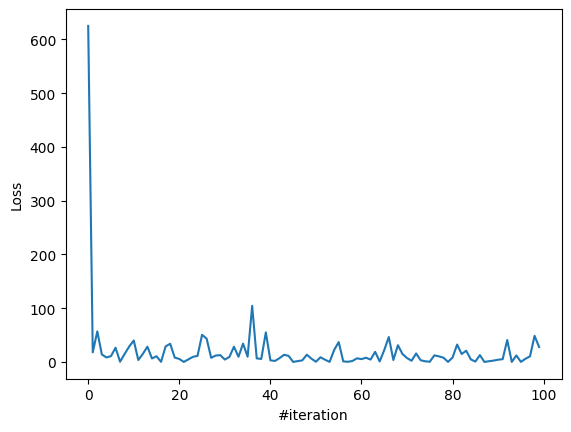

In [140]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
  losses = []

  weights = initialize_params()
  N = len(y_output)

  for epoch in range(epoch_max):
    for i in range(N):
      # get a sample - row i
      features_i = X_feature[i]
      y = y_output[i]

      # Compute output
      y_hat = predict(features_i, weights)

      # Compute loss
      loss = compute_loss(y, y_hat)

      # Compute gradient w1, w2, w3, b
      dl_weights = compute_gradient_wi(features_i, y, y_hat)

      # Update parameters
      weights = update_weight(weights, dl_weights, lr)

      # Logging
      losses.append(loss)

  return weights, losses

X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

In [142]:
# Question 12
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
print(L[9999])

31.33923274153756
